# Expected Occupancy at G1 Climbing+Fitness
Collin Sinclair

## Imports

In [1]:
import pandas as pd # for reading the .csv files
from datetime import datetime # for handling timestamps
import matplotlib.pyplot as plt # for data visualization
import numpy as np # duh
import time
# plt.style.use('dark_background') # so plots look good
# still not sure what the line below does, but I'll keep it around anyway
%matplotlib inline

## Initial Data Cleaning

In [2]:
raw_data = pd.read_csv('g1_occupancy.csv') # import raw data

timestamps = pd.to_datetime(raw_data['timestamp']) # turn timestamps into timestamps
hours = timestamps.dt.hour # like timestamps, but only hours
weekdays = timestamps.dt.dayofweek # like timestamps, but only days of week

counts = raw_data['count'] # store counts in own variable

In [3]:
raw_data['day'] = weekdays
raw_data['hours'] = hours

daily_open_hours = [range(6, 23),
                    range(8, 23),
                    range(6, 23),
                    range(8, 23),
                    range(8, 23),
                    range(8, 21),
                    range(8, 21)] # the range of open hours for each day of the week

hourly_means = [np.array([]) for i in range(7)] # a place to put the hourly means for each day of the week
hourly_stds = [np.array([]) for i in range(7)]

for i in range(7): # for each day of the week
    for hour in daily_open_hours[i]: # for each open hour of that day of the week
        current = raw_data.loc[(raw_data['hours'] == hour) & (raw_data['day'] == i)] # a dataframe for the current day and hour of day
        current_hour_mean_count = current['count'].mean() # the mean of the series of counts for this day and hour
        hourly_means[i] = np.append(hourly_means[i], current_hour_mean_count) # store it!
        current_hour_std = current['count'].std()
        hourly_stds[i] = np.append(hourly_stds[i], current_hour_std)

In [4]:
def pick_color(prev=None):
    g1_blue = (0.2, 0.3, 0.33)
    g1_brown = (0.53, 0.49, 0.38)
    g1_gray = (0.38, 0.38, 0.36)
    g1_colors = [g1_blue, g1_brown, g1_gray]
    index = np.random.randint(0, 3)
    choice = g1_colors[index]
    if prev:
        while choice == prev:
            choice = pick_color()
    return choice

## General Results

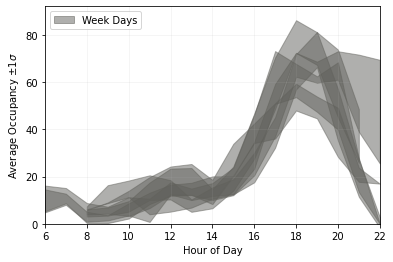

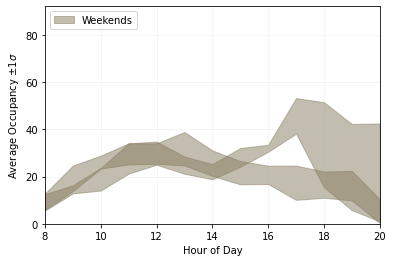

<Figure size 432x288 with 0 Axes>

In [5]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_color = pick_color()
weekend_color = pick_color(week_color)

for i in range(5):
    plt.fill_between(daily_open_hours[i], hourly_means[i] + hourly_stds[i], hourly_means[i] - hourly_stds[i], color = week_color, alpha = 0.5, label = 'Week Days')
    plt.grid(True, alpha = 0.15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Occupancy $\pm 1 \sigma$')
    plt.xlim(6, 22)
    plt.ylim(0, 92)
    
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels, loc = 2)

plt.savefig('weekdays.pdf')
plt.show()
plt.clf()

for i in range(5, 7):
    plt.fill_between(daily_open_hours[i], hourly_means[i] + hourly_stds[i], hourly_means[i] - hourly_stds[i], color = weekend_color, alpha = 0.5, label = 'Weekends')
    plt.grid(True, alpha = 0.15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Occupancy $\pm 1 \sigma$')
    plt.xlim(8, 20)
    plt.ylim(0, 92)
    
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels, loc = 2)

plt.savefig('weekends.pdf')
plt.show()
plt.clf()

## Daily Results

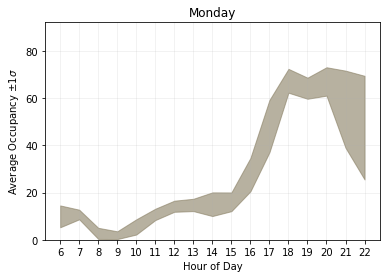

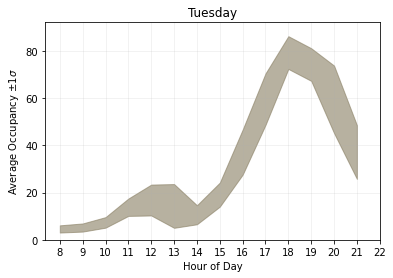

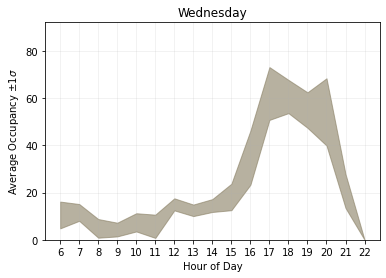

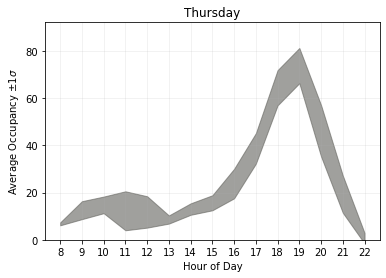

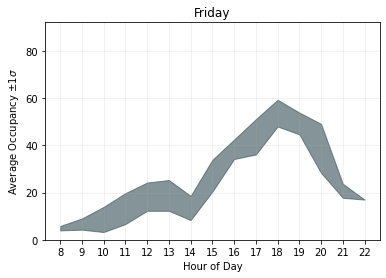

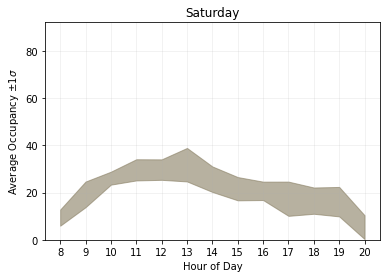

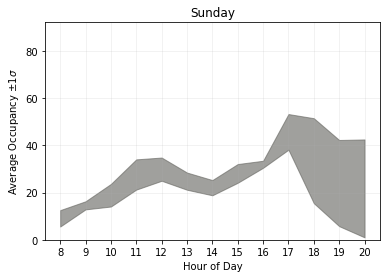

In [6]:
for i in range(7):
#     plt.plot(daily_open_hours[i], hourly_means[i], color = pick_color())
    plt.fill_between(daily_open_hours[i], hourly_means[i] + hourly_stds[i], hourly_means[i] - hourly_stds[i], color = pick_color(), alpha = 0.6, label = day_names[i])
    plt.grid(True, alpha = 0.2)
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Occupancy $\pm 1 \sigma$')
    plt.xticks(ticks=daily_open_hours[i])
    plt.ylim(0, 92)
    plt.title(day_names[i])
    plt.savefig(day_names[i] + '.pdf')
    plt.show()

## Current Time and Day

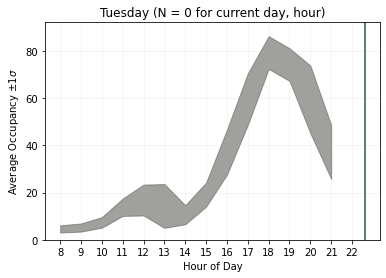

In [7]:
now = datetime.now()
day = now.weekday()
hour = now.hour
minute = now.minute

N = len(raw_data.loc[(raw_data['hours'] == hour) & (raw_data['day'] == day)])

# plt.plot(daily_open_hours[day], hourly_means[day], color = pick_color())
plt.fill_between(daily_open_hours[day], hourly_means[day] + hourly_stds[day], hourly_means[day] - hourly_stds[day], color = pick_color(), alpha = 0.6)
plt.grid(True, alpha = 0.15)
plt.axvline(hour + minute/60, c = pick_color())
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy $\pm 1 \sigma$')
plt.xticks(ticks=daily_open_hours[day])
plt.ylim(0, 92)
plt.title(day_names[day] + ' (N = ' + str(N) + ' for current day, hour)')
plt.savefig('current_day.png', dpi = 300)
plt.show()

In [8]:
len(raw_data)

4591